In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Read data from csv file

In [0]:
data = pd.read_csv("phenome.csv")

df = pd.DataFrame(data)

y = df['label'].values
x = df.drop('label', 1)
x = x.values
assert len(y) == len(x)

In [4]:
print(np.shape(x))

(4509, 256)


Create a vector with the means of each feature for every class

In [7]:
means = []
for label in range(0,5):
  means.append(np.mean(x[y==label], axis=0))
# print(means)
print(np.shape(means))

(5, 256)


In [0]:
S_W = np.zeros((256,256))
for cl,mv in zip(range(0,5), means):
    sc_mat = np.zeros((256,256))                 
    for row in x[y == cl]:
        row, mv = row.reshape(256,1), mv.reshape(256,1) 
        sc_mat += (row-mv).dot((row-mv).T)
    S_W += sc_mat                             


Between Class Scatter Matrix

In [0]:
overall_mean = np.mean(x, axis=0)

S_B = np.zeros((256,256))
for i,mean_vec in enumerate(means):  
  n = x[y==i+1,:].shape[0]
  mean_vec = mean_vec.reshape(256,1) 
  overall_mean = overall_mean.reshape(256,1)
  S_B += n *(mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

In [0]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [40]:
print(np.shape(eig_vecs))

(256, 256)


In [0]:
pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

In [0]:
# first 4 vectors
v = [pairs[0][1], pairs[1][1], pairs[2][1], pairs[3][1]]
w_matrix = np.hstack((v[0].reshape(256,1), v[1].reshape(256,1), v[2].reshape(256,1), v[3].reshape(256,1))).real

In [0]:
X_lda = np.array(x.dot(w_matrix))

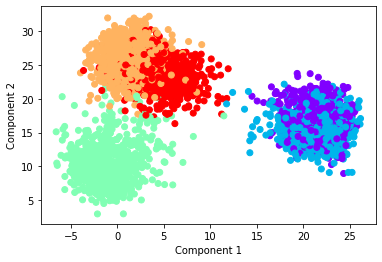

In [44]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow'
)


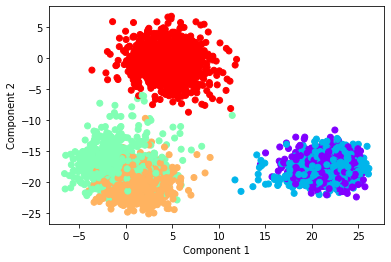

In [45]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,2],
    c=y,
    cmap='rainbow'
)

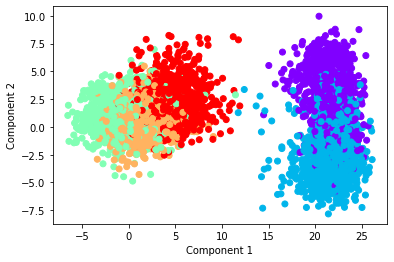

In [46]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,3],
    c=y,
    cmap='rainbow'
)

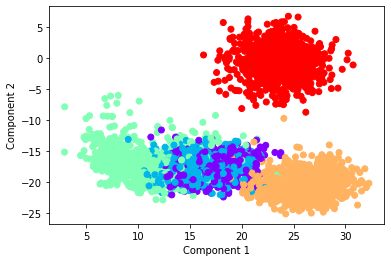

In [47]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    X_lda[:,1],
    X_lda[:,2],
    c=y,
    cmap='rainbow'
)

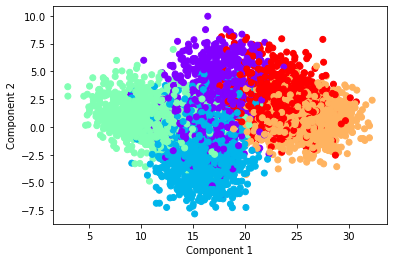

In [48]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    X_lda[:,1],
    X_lda[:,3],
    c=y,
    cmap='rainbow'
)

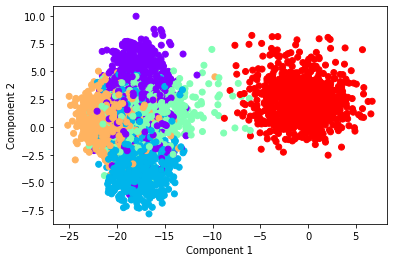

In [49]:
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(
    X_lda[:,2],
    X_lda[:,3],
    c=y,
    cmap='rainbow'
)